In [205]:
import sys 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('cars.csv')
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


Year                -0.232687
Kilometers_Driven   -0.051104
Mileage             -0.595252
Engine               0.714465
Power                0.856620
Seats               -0.000027
Price                1.000000
Name: Price, dtype: float64

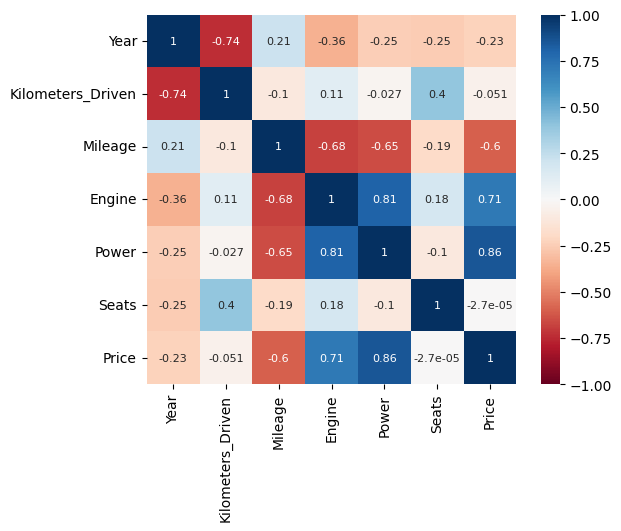

In [219]:
df1 = df.drop(['Car_ID', 'Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], axis=1)
corr = df1.corr()
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, square=True, annot=True, annot_kws={"fontsize":8})
df1.corr()['Price']

In [207]:
df1 = df1.drop(['Year', 'Kilometers_Driven', 'Seats'], axis=1)
df1

,Mileage,Engine,Power,Price
0,15,1498,108,800000
1,17,1597,140,1000000
2,10,4951,395,2500000
3,23,1248,74,600000
4,18,1999,194,850000
...,...,...,...,...
95,16,1950,191,2900000
96,13,2755,171,1400000
97,18,1497,121,750000
98,17,1497,113,850000


In [208]:
X = df1.drop(['Price'], axis = 1)
y = df['Price']

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [210]:
c = lr.intercept_
m = lr.coef_
c, m

(-334651.58394989185,
 array([-10911.2677863 ,    414.34254374,   8396.4969679 ]))

In [211]:
y_pred_train = lr.predict(X_train)


Text(0, 0.5, 'Predicted Charges')

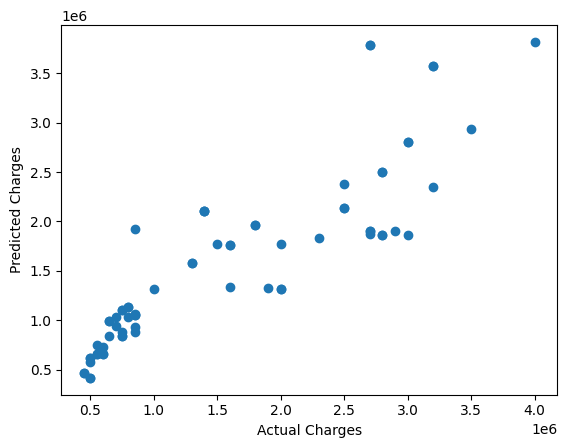

In [212]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')

In [213]:
r2_score(y_train, y_pred_train)

0.7648205239337251

In [214]:
y_pred_test = lr.predict(X_test)

Text(0, 0.5, 'Predicted Charges')

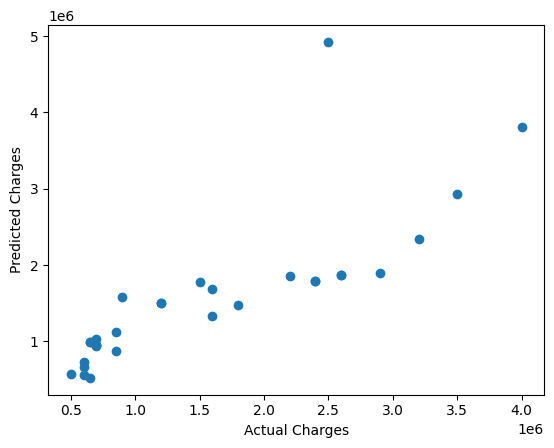

In [215]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')

In [216]:
r2_score(y_test, y_pred_test)

0.6210577577357288

Model score is acceptable, and can be improved further